# Set UP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 合并数据
多个数据合并，横向表堆叠
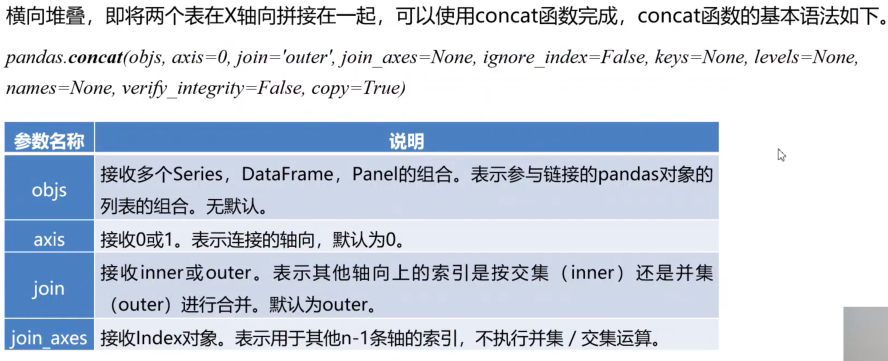

In [11]:
dict1 = {'ID':[1,2,3,4,5,6,7,8,9],
         'System':['win10','win10',np.nan,'win10',
                np.nan,np.nan,'win7','win7','win8'],
      'cpu':['i7','i5',np.nan,'i7',np.nan,np.nan,'i5','i5','i3']}

dict2 = {'ID':[1,2,3,4,5,6,7,8,9],
         'System':[np.nan, np.nan,'win7',np.nan,
                'win8','win7',np.nan,np.nan,np.nan],
        'cpu':[np.nan,np.nan,'i3',np.nan,'i7',
                'i5',np.nan,np.nan,np.nan]}

df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)

print(df1)
print(df2)

print(pd.concat((df1, df2), axis=1)) # axis 指定横向 or 纵向

df1['tmp'] = 3
print(df1)

   ID System  cpu
0   1  win10   i7
1   2  win10   i5
2   3    NaN  NaN
3   4  win10   i7
4   5    NaN  NaN
5   6    NaN  NaN
6   7   win7   i5
7   8   win7   i5
8   9   win8   i3
   ID System  cpu
0   1    NaN  NaN
1   2    NaN  NaN
2   3   win7   i3
3   4    NaN  NaN
4   5   win8   i7
5   6   win7   i5
6   7    NaN  NaN
7   8    NaN  NaN
8   9    NaN  NaN
   ID System  cpu  ID System  cpu
0   1  win10   i7   1    NaN  NaN
1   2  win10   i5   2    NaN  NaN
2   3    NaN  NaN   3   win7   i3
3   4  win10   i7   4    NaN  NaN
4   5    NaN  NaN   5   win8   i7
5   6    NaN  NaN   6   win7   i5
6   7   win7   i5   7    NaN  NaN
7   8   win7   i5   8    NaN  NaN
8   9   win8   i3   9    NaN  NaN
   ID System  cpu  tmp
0   1  win10   i7    3
1   2  win10   i5    3
2   3    NaN  NaN    3
3   4  win10   i7    3
4   5    NaN  NaN    3
5   6    NaN  NaN    3
6   7   win7   i5    3
7   8   win7   i5    3
8   9   win8   i3    3


In [13]:
pd.concat((df1, df2)) # 若其中一个表中有另一个表所不存在的 col 则空值取 NAN

,ID,System,cpu,tmp
0,1,win10,i7,3.0
1,2,win10,i5,3.0
2,3,NaN,NaN,3.0
3,4,win10,i7,3.0
4,5,NaN,NaN,3.0
5,6,NaN,NaN,3.0
6,7,win7,i5,3.0
7,8,win7,i5,3.0
8,9,win8,i3,3.0
0,1,NaN,NaN,NaN


In [14]:
pd.concat((df1, df2), join='outer') # 外连接表示求两张表的并集（没有的加上） default 情况

,ID,System,cpu,tmp
0,1,win10,i7,3.0
1,2,win10,i5,3.0
2,3,NaN,NaN,3.0
3,4,win10,i7,3.0
4,5,NaN,NaN,3.0
5,6,NaN,NaN,3.0
6,7,win7,i5,3.0
7,8,win7,i5,3.0
8,9,win8,i3,3.0
0,1,NaN,NaN,NaN


In [16]:
pd.concat((df1, df2), join='inner') # 两者 cols 取交集

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,NaN,NaN
3,4,win10,i7
4,5,NaN,NaN
5,6,NaN,NaN
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3
0,1,NaN,NaN


In [21]:
df1.drop('tmp', axis=1)
# df1.append(df2) # append 已经被弃用了。

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,NaN,NaN
3,4,win10,i7
4,5,NaN,NaN
5,6,NaN,NaN
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


## 主键合并
类似 SQL 中的 join 即将主键相同的合并

In [2]:
order_sample = pd.read_csv('learning/data/order_sample.csv')
dishes_info = pd.read_csv('learning/data/dishes_info.csv')
print(order_sample.head(3))
print(dishes_info.head(3))
order_sample.shape

   detail_id  order_id  dishes_id     place_order_time
0       2956       417     610062  2016-08-01 11:05:36
1       2958       417     609957  2016-08-01 11:07:07
2       2961       417     609950  2016-08-01 11:07:40
   dishes_id        dishes_name  amounts
0     610062               蒜蓉生蚝       49
1     609957  蒙古烤羊腿\r\n\r\n\r\n       48
2     609950               大蒜苋菜       30


(2779, 4)

## 重叠合并

In [3]:
dict1 = {'ID':[1,2,3,4,5,6,7,8,9],
         'System':['win10','win10',np.nan,'win10',
                np.nan,np.nan,'win7','win7','win8'],
      'cpu':['i7','i5',np.nan,'i7',np.nan,np.nan,'i5','i5','i3']}

dict2 = {'ID':[1,2,3,4,5,6,7,8,9],
         'System':[np.nan, np.nan,'win7',np.nan,
                'win8','win7',np.nan,np.nan,np.nan],
        'cpu':[np.nan,np.nan,'i3',np.nan,'i7',
                'i5',np.nan,np.nan,np.nan]}
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)

print(df1)
print(df2)

   ID System  cpu
0   1  win10   i7
1   2  win10   i5
2   3    NaN  NaN
3   4  win10   i7
4   5    NaN  NaN
5   6    NaN  NaN
6   7   win7   i5
7   8   win7   i5
8   9   win8   i3
   ID System  cpu
0   1    NaN  NaN
1   2    NaN  NaN
2   3   win7   i3
3   4    NaN  NaN
4   5   win8   i7
5   6   win7   i5
6   7    NaN  NaN
7   8    NaN  NaN
8   9    NaN  NaN


In [4]:
df1.combine_first(df2) # 缺失信息互补

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,win7,i3
3,4,win10,i7
4,5,win8,i7
5,6,win7,i5
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


# 清洗数据
## 检测与处理重复值
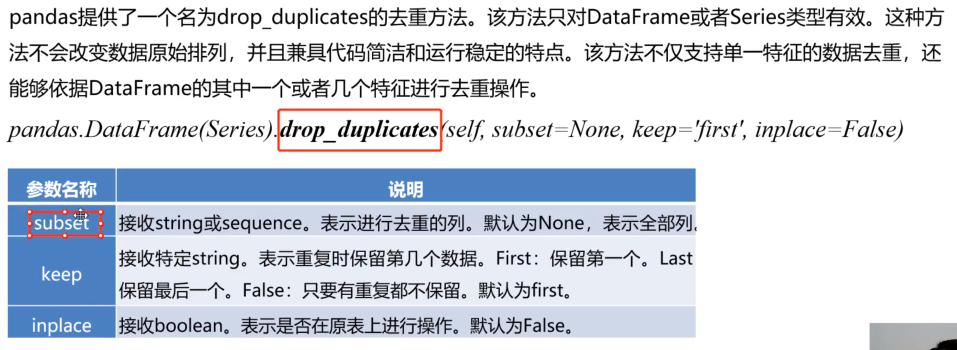


In [5]:
detail_duplicates = pd.read_csv('learning/data/detail_duplicates.csv')
detail_duplicates

,order_id,dishes_name,counts,amounts
0,NaN,蒜蓉生蚝,1.0,49.0
1,NaN,NaN,1.0,48.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
5,NaN,NaN,NaN,NaN
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0


In [6]:
detail_duplicates.drop_duplicates() # subset 指定去除重复的字段，默认则为所有字段均相同

,order_id,dishes_name,counts,amounts
0,NaN,蒜蓉生蚝,1.0,49.0
1,NaN,NaN,1.0,48.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
5,NaN,NaN,NaN,NaN
6,301.0,香烤牛排\r\n,1.0,55.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0
10,417.0,蒙古烤羊腿\r\n\r\n\r\n,1.0,48.0


In [8]:
detail_duplicates.drop_duplicates(subset='order_id', keep='last') # keep=last 保留重复项中最后一条

,order_id,dishes_name,counts,amounts
5,NaN,NaN,NaN,NaN
9,301.0,番茄有机花菜,1.0,32.0
10,417.0,蒙古烤羊腿\r\n\r\n\r\n,1.0,48.0


In [9]:
detail_duplicates.drop_duplicates(subset=['order_id', 'dishes_name'], keep="first")

,order_id,dishes_name,counts,amounts
0,NaN,蒜蓉生蚝,1.0,49.0
1,NaN,NaN,1.0,48.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
6,301.0,香烤牛排\r\n,1.0,55.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0
10,417.0,蒙古烤羊腿\r\n\r\n\r\n,1.0,48.0


## 检测处理缺失值

In [15]:
print(detail_duplicates)
# print(detail_duplicates.isnull()) # True 表示该元素为 null
# print(detail_duplicates.notnull()) # False 表示该元素为 null

detail_duplicates.dropna(axis=0) # axis = 0 表示删除记录

    order_id        dishes_name  counts  amounts
0        NaN               蒜蓉生蚝     1.0     49.0
1        NaN                NaN     1.0     48.0
2      417.0               大蒜苋菜     1.0     30.0
3      417.0              芝麻烤紫菜     1.0     25.0
4      417.0                蒜香包     1.0     13.0
5        NaN                NaN     NaN      NaN
6      301.0           香烤牛排\r\n     1.0     55.0
7      417.0              芝麻烤紫菜     1.0     25.0
8      301.0              芝麻烤紫菜     1.0     25.0
9      301.0             番茄有机花菜     1.0     32.0
10     417.0  蒙古烤羊腿\r\n\r\n\r\n     1.0     48.0


,order_id,dishes_name,counts,amounts
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0
10,417.0,蒙古烤羊腿\r\n\r\n\r\n,1.0,48.0


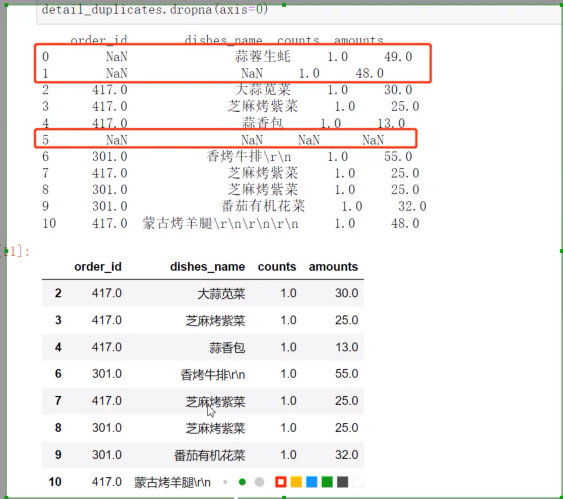

In [17]:
detail_duplicates.dropna(axis=0, how='any') # 删除含有任意一个缺失值的行，为默认行为

,order_id,dishes_name,counts,amounts
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0
10,417.0,蒙古烤羊腿\r\n\r\n\r\n,1.0,48.0


In [18]:
detail_duplicates.dropna(axis=0, how='all') # 删除全为缺失值的行

,order_id,dishes_name,counts,amounts
0,NaN,蒜蓉生蚝,1.0,49.0
1,NaN,NaN,1.0,48.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0
10,417.0,蒙古烤羊腿\r\n\r\n\r\n,1.0,48.0


In [21]:
detail_duplicates.dropna(axis=1, how='all') # 删除列数据

,order_id,dishes_name,counts,amounts
0,NaN,蒜蓉生蚝,1.0,49.0
1,NaN,NaN,1.0,48.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
5,NaN,NaN,NaN,NaN
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0


In [22]:
detail_duplicates.dropna(axis=0, how='any', subset=['dishes_name', 'amounts']) # 根据某些列删除 

,order_id,dishes_name,counts,amounts
0,NaN,蒜蓉生蚝,1.0,49.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0
10,417.0,蒙古烤羊腿\r\n\r\n\r\n,1.0,48.0


In [24]:
# 通过填充处理缺失值
print(detail_duplicates.fillna(1)) # 用固定值
detail_duplicates.fillna(method='bfill') # 用临近的后面元素填充前面的值

    order_id        dishes_name  counts  amounts
0        1.0               蒜蓉生蚝     1.0     49.0
1        1.0                  1     1.0     48.0
2      417.0               大蒜苋菜     1.0     30.0
3      417.0              芝麻烤紫菜     1.0     25.0
4      417.0                蒜香包     1.0     13.0
5        1.0                  1     1.0      1.0
6      301.0           香烤牛排\r\n     1.0     55.0
7      417.0              芝麻烤紫菜     1.0     25.0
8      301.0              芝麻烤紫菜     1.0     25.0
9      301.0             番茄有机花菜     1.0     32.0
10     417.0  蒙古烤羊腿\r\n\r\n\r\n     1.0     48.0


,order_id,dishes_name,counts,amounts
0,417.0,蒜蓉生蚝,1.0,49.0
1,417.0,大蒜苋菜,1.0,48.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
5,301.0,香烤牛排\r\n,1.0,55.0
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0


## 检测与处理异常值
3σ 原则，箱型图法则

In [25]:
data = pd.read_excel('learning/data/meal_order_detail.xlsx')
data.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1aaa214c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1aaa21b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1aaa21100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1aaa04400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1aaa04670>],
 'means': []}

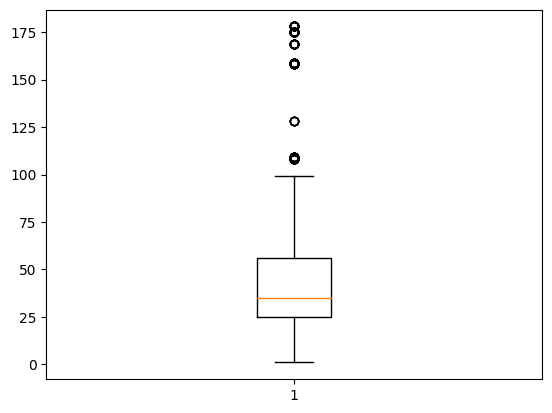

In [28]:
plt.boxplot(data['amounts'])

箱型图中 QL 表示下四分位数，即 box 下边缘， QU 表示上四分位数，即 box 上边缘。 IQR 为四分位数间距，是两者之差。橙色线为中位数。

QL - 1.5 IQR 为下方线， QU + 1.5 IQR 为上方线。介于两线之间为正常值，否则为**异常值**

In [30]:
def replace(x):
    import numpy as np
    QU = x.quantile(0.75)
    QL = x.quantile(0.25)
    IQR = QU - QL
    x.loc[(x > QU + 1.5*IQR) | (x < QL - 1.5*IQR)] = np.nan # 需要对 x 本身进行修改而非其切片 view
    return x

In [31]:
data['amounts'].isnull().sum()

0

In [34]:
replace(data['amounts']).isnull().sum()

173

# 标准化数据
## 离差标准化
对原始数据进行线性变换，将其数值映射到[0,1]区间中，公式为
$X^*=\frac{X-\min}{\max-\min}$
## 标准差标准化
零均值标准化 $X^*=\frac{X-\overline{X}}{\sigma}$
## 小数定标标准化
通过移动数据的小数尾数，映射到区间[-1,1] 中，取决于数据绝对值中的最大值
$X^*=\frac{X}{10^k}$

In [2]:
data = pd.read_excel('learning/data/meal_order_detail.xlsx')
data.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


In [3]:
data[['counts', 'amounts']].describe()

,counts,amounts
count,2779.000000,2779.000000
mean,1.111191,45.337172
std,0.625428,36.808550
min,1.000000,1.000000
25%,1.000000,25.000000
50%,1.000000,35.000000
75%,1.000000,56.000000
max,10.000000,178.000000


In [11]:
def min_max_scaler(x):
    return (x-x.min()) / (x.max()-x.min())

def std_scaler(x):
    return (x-x.mean())/x.std()

def decimal_scaler(x):
    import numpy as np
    k = np.ceil(np.log10(x.abs().max()))
    return x/10**k

In [14]:
data[['counts', 'amounts']].agg([min_max_scaler, std_scaler, decimal_scaler]).head()

counts                                  amounts             \
  min_max_scaler std_scaler decimal_scaler min_max_scaler std_scaler   
0            0.0  -0.177784            0.1       0.271186   0.099510   
1            0.0  -0.177784            0.1       0.265537   0.072343   
2            0.0  -0.177784            0.1       0.163842  -0.416674   
3            0.0  -0.177784            0.1       0.135593  -0.552512   
4            0.0  -0.177784            0.1       0.067797  -0.878523   

                  
  decimal_scaler  
0          0.049  
1          0.048  
2          0.030  
3          0.025  
4          0.013

# 转换数据
## 哑变量处理
某些实际数据中特征类型不一定为数值型

In [2]:
data = pd.read_excel('learning/data/meal_order_detail.xlsx')
data.head(3)

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442


In [5]:
print(data['dishes_name'].value_counts())
pd.get_dummies(data[['amounts', 'dishes_name']])

dishes_name
白饭/大碗               92
凉拌菠菜                77
谷稻小庄                72
麻辣小龙虾               65
白饭/小碗               60
                    ..
红酒土豆烧鸭腿_x000D_\n     1
照烧鸡腿_x000D_\n        1
冰镇花螺                 1
五香酱驴肉_x000D_\n       1
百里香奶油烤紅酒牛肉           1
Name: count, Length: 154, dtype: int64


,amounts,dishes_name_ 42度海之蓝,dishes_name_ 北冰洋汽水,dishes_name_38度剑南春,dishes_name_50度古井贡酒,dishes_name_52度泸州老窖,dishes_name_53度茅台,dishes_name_一品香酥藕,dishes_name_三丝鳝鱼,dishes_name_三色凉拌手撕兔,...,dishes_name_香辣腐乳炒虾,dishes_name_香酥两吃大虾,dishes_name_鱼香肉丝拌面,dishes_name_鲜美鳝鱼,dishes_name_鸡蛋、肉末肠粉,dishes_name_麻辣小龙虾,dishes_name_黄尾袋鼠西拉子红葡萄酒,dishes_name_黄油曲奇饼干,dishes_name_黄花菜炒木耳,dishes_name_黑米恋上葡萄
0,49,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,48,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2775,40,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2776,13,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2777,30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 离散化连续数据
通过区间划分得到：
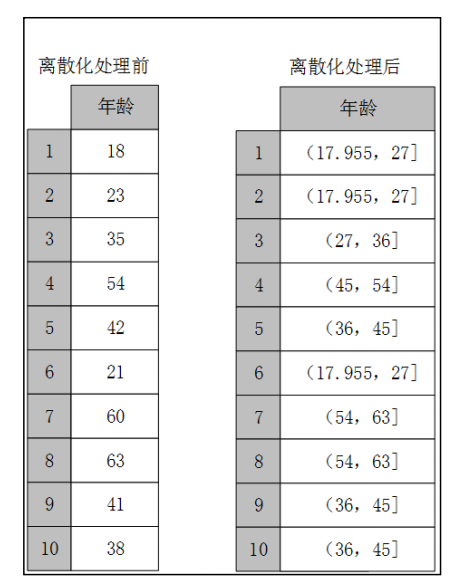

In [6]:
pd.cut(data['amounts'], 5) # 5 为区间划分数目

0        (36.4, 71.8]
1        (36.4, 71.8]
2       (0.823, 36.4]
3       (0.823, 36.4]
4       (0.823, 36.4]
            ...      
2774    (0.823, 36.4]
2775     (36.4, 71.8]
2776    (0.823, 36.4]
2777    (0.823, 36.4]
2778    (0.823, 36.4]
Name: amounts, Length: 2779, dtype: category
Categories (5, interval[float64, right]): [(0.823, 36.4] < (36.4, 71.8] < (71.8, 107.2] < (107.2, 142.6] < (142.6, 178.0]]